### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\jnyam\Documents\Instacart Basket Analysis'

In [3]:
df_ord_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ord_prods_cust_9.1.pkl'))

In [4]:
df_ord_prods_cust.shape

(32404859, 34)

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
#Checking PII data
df_ord_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


There is data that includes personally identifiable information (PII), such as first and last name.

In [6]:
# Dropping PII data
df_PII = df_ord_prods_cust.drop(columns = ['first_name', 'last_name'])

In [7]:
df_PII

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,False,19675.0,1.0,1.0,...,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,True,47210.0,1.0,0.0,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,False,47210.0,1.0,1.0,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,False,47210.0,1.0,1.0,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

#### 3.1 Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).


In [8]:
# define the function
result = []
for value in df_ord_prods_cust['state']:
    
  if (value in ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
    result.append ('Northeast')
  elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana','Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
    result.append ('Midwest')
  elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama']):
    result.append ('South') 
  else: result.append ('West')

In [9]:
# apply the function
df_ord_prods_cust['region'] = result

In [10]:
df_ord_prods_cust['region'].value_counts(dropna = False)

West         10858672
South         8226126
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

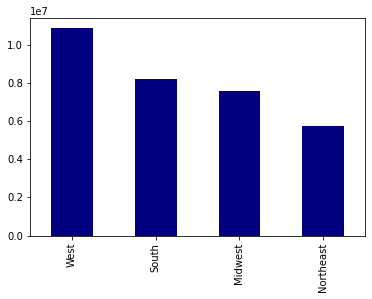

In [11]:
# Region visualization
region = df_ord_prods_cust['region'].value_counts().plot.bar(color = 'navy')

In [12]:
# Exporting visualization
region = region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region.png'))

#### 3.2 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [158]:
# checking spending flag by regions
crosstab_income_region = pd.crosstab(df_ord_prods_cust['region'], df_ord_prods_cust['spending_flag'], dropna = False )

In [159]:
crosstab_income_region

spending_flag,High spender,Low spender
region,,
Midwest,155932,7441350
Northeast,108180,5614511
South,164113,8061866
West,205639,10652887


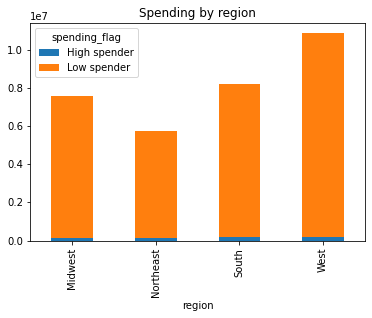

In [160]:
crosstab_income_region = crosstab_income_region.plot(kind = 'bar', stacked = True, title = 'Spending by region')

In [16]:
# Exporting visualization
crosstab_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_region.png'), bbox_inches="tight")

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.


In [17]:
df_ord_prods_cust['max_order'].value_counts(dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: max_order, Length: 99, dtype: int64

In [18]:
# Create a exclusion flag for low activity customer
df_ord_prods_cust.loc[df_ord_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [19]:
# Create a exclusion flag for normal activity customer
df_ord_prods_cust.loc[df_ord_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'Normal activity customer'

In [20]:
# Counts the number of low and normal activity customers
df_ord_prods_cust['exclusion_flag'].value_counts (dropna = False)

Normal activity customer    30964564
Low activity customer        1440295
Name: exclusion_flag, dtype: int64

In [21]:
# create dataset for low activity customer
df_low_activity_customer = df_ord_prods_cust[df_ord_prods_cust['exclusion_flag'] =='Low activity customer']

In [22]:
df_low_activity_customer['max_order'].value_counts (dropna = False)

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

In [23]:
# create dataset for normal activity customer
df_normal_activity_customer = df_ord_prods_cust[df_ord_prods_cust['exclusion_flag'] =='Normal activity customer']

In [24]:
df_normal_activity_customer['max_order'].value_counts (dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
93      50333
90      48328
97      44949
98      44587
96      40453
Name: max_order, Length: 95, dtype: int64

In [25]:
# Export the normal activity customer dataset
df_normal_activity_customer.to_pickle(os.path.join(path,'02 Data','Prepared Data','normal_activity_customer.pkl'))

In [26]:
# Export the low activity customer dataset
df_low_activity_customer.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customer.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### --------------------------------------------------------------- AGE-----------------------------------------------------------------

In [27]:
# Checkin min age
df_ord_prods_cust.age.min()

18

In [28]:
# Checkin max age
df_ord_prods_cust.age.max()

81

In [29]:
df_ord_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,dependants,family_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer


In [30]:
# Creating function for age group
age_group = []
  
for value in df_ord_prods_cust ['age']:
  if (value > 18) & (value <= 34 ):
    age_group.append ('18-34 age group')
  elif (value > 35) &  (value <= 50):
    age_group.append ('35-50 age group')
  elif (value > 51) & (value <= 69):
     age_group.append ('51-69 age group')
  else:
     age_group.append ('70-81 age group')

In [31]:
# Applying the function
df_ord_prods_cust['age_group'] = age_group

In [32]:
# Counting age groups
df_ord_prods_cust['age_group'].value_counts(dropna = False)

51-69 age group    9047702
18-34 age group    8127181
35-50 age group    7615806
70-81 age group    7614170
Name: age_group, dtype: int64

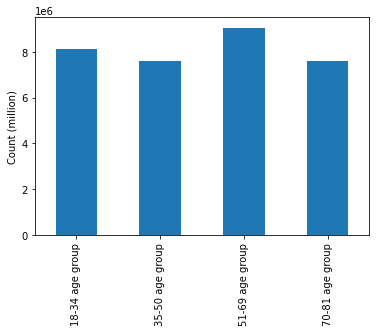

In [33]:
# Age group visualization
bar_age_group = df_ord_prods_cust['age_group'].value_counts().sort_index().plot.bar(ylabel = 'Count (million)')


In [152]:
# Exporting visualiztion
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'), bbox_inches="tight")

In [34]:
#Checking spending by age group
crosstab_age_spending_1 = pd.crosstab(df_ord_prods_cust['age_group'], df_ord_prods_cust['spending_flag'], dropna = False )

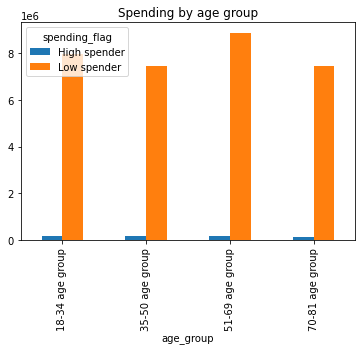

In [35]:
crosstab_age_spending_1 = crosstab_age_spending_1.plot(kind = 'bar', stacked = False, title = 'Spending by age group')

In [36]:
# Exporting visualiztion
crosstab_age_spending_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_spending_1.png'), bbox_inches="tight")

### ------------------------------------------------------- INCOME---------------------------------------------------------

In [37]:
# Checkin min income
df_ord_prods_cust.income.min()

25903

In [38]:
# Checkin max income
df_ord_prods_cust.income.max()

593901

In [39]:
# Create 'income range' list

income_range = []

for value in df_ord_prods_cust['income']:
    if value < 20000:
        income_range.append('Below or near poverty level')
    elif (value >= 20000) and (value <= 44999):
        income_range.append('Low income')
    elif (value >= 45000) and (value <= 139999):
        income_range.append('Middle class')
    elif (value >= 140000) and (value <= 149999):
        income_range.append('Upper middle class')
    elif (value >= 150000) and (value <= 199999):
        income_range.append('High income')
    elif value >= 200000:
        income_range.append('Highest income')

In [40]:
# Applying income range
df_ord_prods_cust['income_range'] = income_range

In [41]:
# Counting income range
df_ord_prods_cust['income_range'].value_counts(dropna = False)

Middle class          23833922
High income            3793138
Low income             2694896
Upper middle class     1824460
Highest income          258443
Name: income_range, dtype: int64

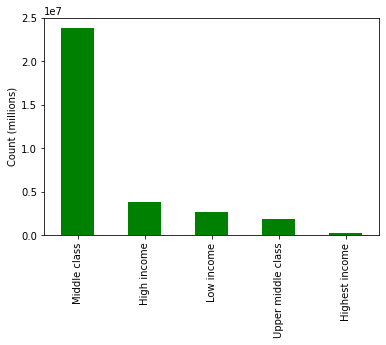

In [42]:
# income range visualization
bar_income = df_ord_prods_cust['income_range'].value_counts().plot.bar(ylabel = 'Count (millions)', color = 'green')

In [43]:
# Exporting visualization
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'), bbox_inches="tight")

In [211]:
# Checking spending by income range
crosstab_income_age = pd.crosstab(df_ord_prods_cust['income_range'], df_ord_prods_cust['age_group'], dropna = False )

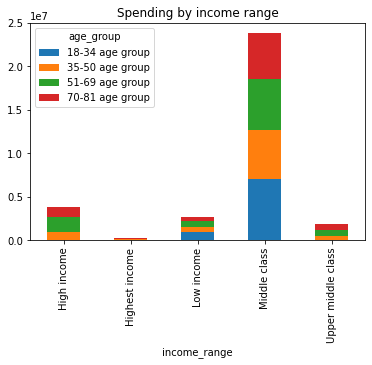

In [212]:
crosstab_income_age_11 = crosstab_income_age.plot(kind = 'bar', stacked = True, title = 'Spending by income range')

In [213]:
# Exporting visualization
crosstab_income_age_11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_age_11.png'), bbox_inches="tight")

### -------------------------------------------------- FAMILY STATUS---------------------------------------------------

In [47]:
df_ord_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,state,age,date_joined,dependants,family_status,income,region,exclusion_flag,age_group,income_range
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,18-34 age group,Low income
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,18-34 age group,Low income
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,18-34 age group,Low income
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,18-34 age group,Low income
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,18-34 age group,Low income


In [48]:
# Counting family status
df_ord_prods_cust['family_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: family_status, dtype: int64

In [49]:
# Calculation of percentage
married = 22756753 / (22756753+5325691+2771812+1550603)*100                            

In [50]:
# Calculation of percentage
single  = 5325691 / (22756753+5325691+2771812+1550603)*100                              

In [51]:
# Calculation of percentage
divorced_widowed = 2771812 / (22756753+5325691+2771812+1550603)*100 

In [52]:
# Calculation of percentage
living_with_parents_and_siblings  = 1550603 / (22756753+5325691+2771812+1550603)*100 

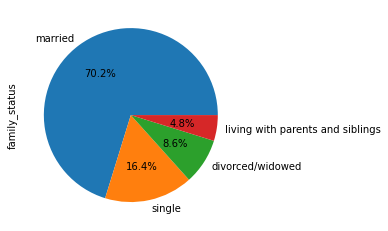

In [53]:
family_status = df_ord_prods_cust['family_status'].value_counts().plot.pie(autopct = '%1.1f%%')

In [54]:
# Exporting visualization
family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status.png'), bbox_inches="tight")

### --------------------------------------- FAMILY STATUS/INCOME RANGE----------------------------------------

In [55]:
# Checking income range by family status
crosstab_fs = pd.crosstab(df_ord_prods_cust['family_status'], df_ord_prods_cust['income_range'], dropna = False )

In [56]:
crosstab_fs.head()

income_range,High income,Highest income,Low income,Middle class,Upper middle class
family_status,,,,,
divorced/widowed,509384,24742,169205,1833590,234891
living with parents and siblings,10961,4175,178982,1354683,1802
married,2812284,188737,1847753,16539624,1368355
single,460509,40789,498956,4106025,219412


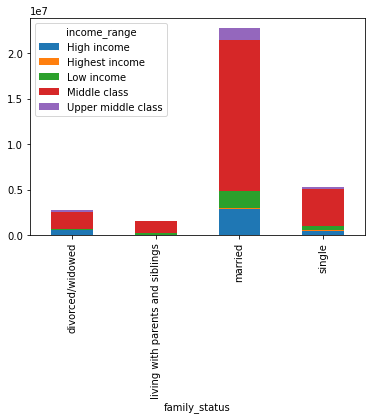

In [57]:
crosstab_fse = crosstab_fs.plot(kind = 'bar', stacked = True)

In [58]:
# Exporting visualization
crosstab_fse.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_fse.png'), bbox_inches="tight")

### -----------------------------------------GOODS------------------------------------------

In [59]:
df_ord_prods_cust['product_name'].value_counts(dropna = False)

Banana                                                    472565
Bag of Organic Bananas                                    379450
Organic Strawberries                                      264683
Organic Baby Spinach                                      241921
Organic Hass Avocado                                      213584
                                                           ...  
Deep Clean Cleanser & Mask                                     1
Glycerine Soap Cucumber                                        1
Pure Performance Restorative Shampoo Chamomile & Honey         1
Gluten Free Almond Snap Cookies                                1
Indian Wells Merlot                                            1
Name: product_name, Length: 49661, dtype: int64

In [60]:
# Create goods profile list
goods_profile = []

for value in df_ord_prods_cust['department_id']:
    if value == 1:
        goods_profile.append('Frozen')
    elif value == 2:
        goods_profile.append('Other')
    elif value == 3:
        goods_profile.append('Bakery')
    elif value == 4:
        goods_profile.append('Produce')
    elif value == 5:
        goods_profile.append('Alcohol')
    elif value == 6:
        goods_profile.append('International')
    elif value == 7:
        goods_profile.append('Beverages')
    elif value == 8:
        goods_profile.append('Pets')
    elif value == 9:
        goods_profile.append('Dry goods pasta')
    elif value == 10:
        goods_profile.append('Bulk')
    elif value == 11:
        goods_profile.append('Personal care')
    elif value == 12:
        goods_profile.append('Meat seafood')
    elif value == 13:
        goods_profile.append('Pantry')
    elif value == 14:
        goods_profile.append('Breakfast')
    elif value == 15:
        goods_profile.append('Canned goods')
    elif value == 16:
        goods_profile.append('Dairy eggs')
    elif value == 17:
        goods_profile.append('Household')
    elif value == 18:
        goods_profile.append('Babies')
    elif value == 19:
        goods_profile.append('Snacks')
    elif value == 20:
        goods_profile.append('Deli')
    elif value == 21:
        goods_profile.append('Missing')

In [61]:
# Applying the funtion
df_ord_prods_cust['goods_profile'] = goods_profile

In [62]:
df_ord_prods_cust['goods_profile'].value_counts()

Produce            9479291
Dairy eggs         5398747
Snacks             2887550
Beverages          2688123
Frozen             2234743
Pantry             1875369
Bakery             1172428
Canned goods       1068058
Deli               1051249
Dry goods pasta     866627
Household           738666
Meat seafood        708927
Breakfast           703033
Personal care       447572
Babies              423802
International       269253
Alcohol             153696
Pets                 97716
Missing              69145
Other                36291
Bulk                 34573
Name: goods_profile, dtype: int64

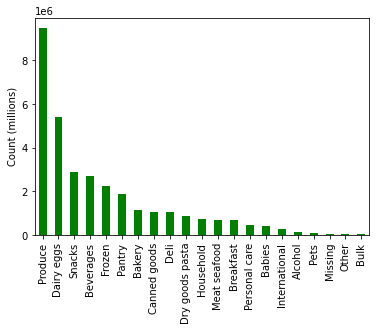

In [147]:
bar_goods_profile = df_ord_prods_cust['goods_profile'].value_counts().plot.bar(ylabel = 'Count (millions)', color = 'green')

In [148]:
# Exporting visualization
bar_goods_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_goods_profile.png'), bbox_inches="tight")

In [204]:
crosstab_gf_ff = pd.crosstab(df_ord_prods_cust['goods_profile'], df_ord_prods_cust['frequency_flag'], dropna = False )

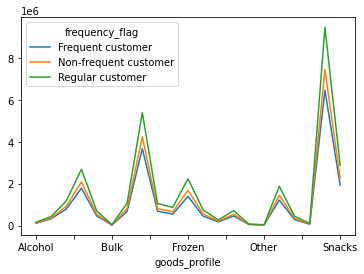

In [205]:
crosstab_gf_ff = crosstab_gf_ff.plot(kind = 'line', stacked = True)

In [206]:
crosstab_gf_ff.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_gf_ff.png'), bbox_inches="tight")

In [150]:
# Checking price range by frequency
crosstab_goods = pd.crosstab(df_ord_prods_cust['frequency_flag'], df_ord_prods_cust['price_range_loc'], dropna = False )

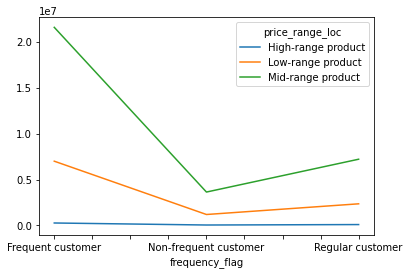

In [151]:
crosstab_goods = crosstab_goods.plot(kind = 'line', stacked = True)

In [71]:
# Exporting visualization
crosstab_goods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_goods.png'))

  ### ------------------------------DEPENDANTS-------------------------------------------

In [72]:
# Counting dependants
df_ord_prods_cust['dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: dependants, dtype: int64

In [73]:
# checking income range by number of dependants 
crosstab_dep = pd.crosstab(df_ord_prods_cust['income_range'], df_ord_prods_cust['dependants'], dropna = False )

In [74]:
crosstab_dep

dependants,0,1,2,3
income_range,,,,
High income,969893,945861,936419,940965
Highest income,65531,60132,70790,61990
Low income,668161,659525,690590,676620
Middle class,5939615,5950213,5953576,5990518
Upper middle class,454303,465373,439768,465016


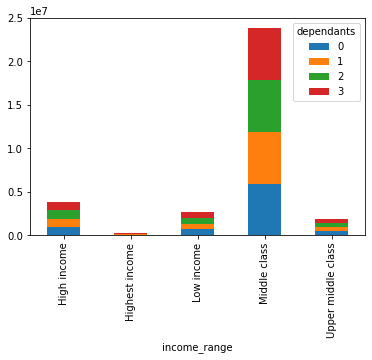

In [75]:
crosstab_dep = crosstab_dep.plot(kind = 'bar', stacked = True)

In [153]:
# Exporting visualization
crosstab_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dep.png'))

### 6. Create an appropriate visualization to show the distribution of profiles.

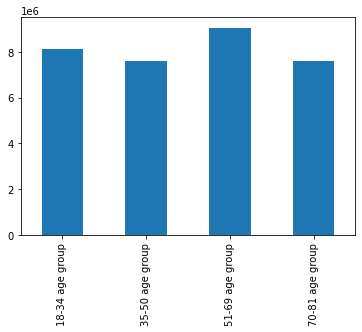

In [76]:
# Age group visualization
bar_age_group = df_ord_prods_cust['age_group'].value_counts().sort_index().plot.bar()

In [77]:
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

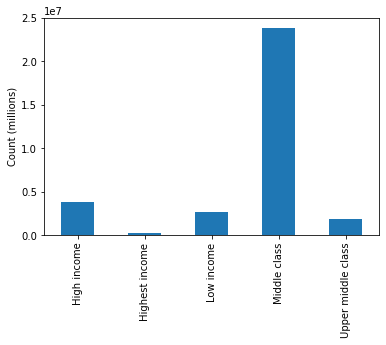

In [78]:
# income range visualization
bar_income_range = df_ord_prods_cust['income_range'].value_counts().sort_index().plot.bar(ylabel = 'Count (millions)')

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [154]:
# Order number by income range
df_ord_prods_cust.groupby('income_range').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                           mean min max
income_range                           
High income           17.313656   1  99
Highest income        19.731152   1  99
Low income            15.870704   1  99
Middle class          17.232468   1  99
Upper middle class    17.119757   1  99

In [155]:
# Order number by family status
df_ord_prods_cust.groupby('family_status').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                                         mean min max
family_status                                        
divorced/widowed                    17.275873   1  99
living with parents and siblings    17.296372   1  99
married                             17.088283   1  99
single                              17.258766   1  99

In [156]:
# Order number by age group
df_ord_prods_cust.groupby('age_group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                        mean min max
age_group                           
18-34 age group    17.126150   1  99
35-50 age group    17.234069   1  99
51-69 age group    17.142071   1  99
70-81 age group    17.068041   1  99

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [165]:
ct_region_fs= pd.crosstab(df_ord_prods_cust['region'], df_ord_prods_cust['family_status'], dropna = False )

In [169]:
ct_region_fs

<AxesSubplot:xlabel='region'>

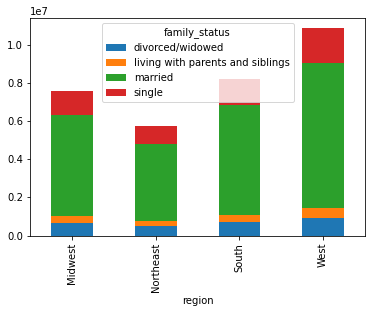

In [166]:
ct_region_fs = ct_region_fs.plot(kind = 'bar', stacked = True)

In [177]:
ct_region_fs.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ct_region_fs.png'))

In [167]:
ct_region_ir = pd.crosstab(df_ord_prods_cust['income_range'], df_ord_prods_cust['region'], dropna = False )

In [170]:
ct_region_ir

<AxesSubplot:xlabel='income_range'>

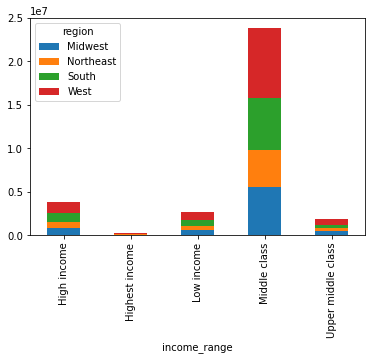

In [168]:
ct_region_ir = ct_region_ir.plot(kind = 'bar', stacked = True)

In [178]:
ct_region_ir.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ct_region_ir.png'))

In [175]:
ct_region_department = pd.crosstab(df_ord_prods_cust['goods_profile'], df_ord_prods_cust['income_range'], dropna = False )

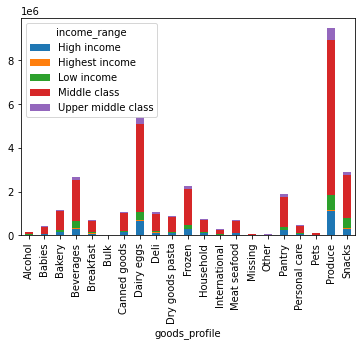

In [176]:
ct_region_department = ct_region_department.plot(kind = 'bar', stacked = True)

In [179]:
ct_region_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ct_region_department.png'))